In [1]:
from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


In [2]:
m = MarkovACTR(setup=False)
m.setup( model='markov-model1', verbose=False)
m.run_experiment(100)

In [3]:
df = m.calculate_stay_probability()

In [4]:
df_state1stay = df.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index()
df_state1stay

,received_reward,reward_frequency,state_frequency,state1_stay
0,0,common,common,0.400000
1,0,common,rare,0.696970
2,0,rare,common,0.727273
3,0,rare,rare,1.000000
4,2,common,common,0.891892
5,2,common,rare,1.000000


In [5]:
print("gained rewards: %d" % (df['received_reward'].sum()))

gained rewards: 80


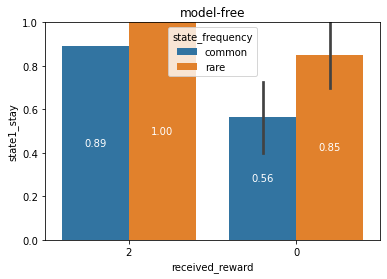

In [6]:
ax = sns.barplot(data=df_state1stay, x='received_reward', y='state1_stay',
                 order = sorted(df['received_reward'].unique(), reverse=True), 
                 hue='state_frequency')
ax.set(ylim=(0, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
plt.title('model-free')
plt.show()

In [7]:
m.calculate_real_frequency().round(2)

,state1_selected_stimulus,state1_frequency,state2_selected_stimulus_type,state2_frequency1,state2_frequency2
0,A2,0.73,NaN,NaN,NaN
1,A1,0.27,B,0.59,NaN
2,A1,0.27,C,0.41,NaN
3,A2,NaN,C,NaN,0.66
4,A2,NaN,B,NaN,0.34


## ACT-R TRACE

In [29]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model2', verbose=True, reload=True)

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7} <<
 	>> ACT-R PARAMETERS: None <<



In [30]:
m.run_experiment(2)

<[MARKOV_STATE] 	[k, 1.21]'A2' 	[k, 1.01]'C2' 	R:[2] 	[C][C]
<[MARKOV_STATE] 	[f, 1.08]'A1' 	[k, 0.96]'B2' 	R:[0] 	[C][C]


In [31]:
m.log

[<[MARKOV_STATE] 	[k, 1.21]'A2' 	[k, 1.01]'C2' 	R:[2] 	[C][C],
 <[MARKOV_STATE] 	[f, 1.08]'A1' 	[k, 0.96]'B2' 	R:[0] 	[C][C]]